# Importing required libraries:

In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

# Import dataset

In [4]:
df = pd.read_csv("ETTh1_without_missing.csv")
df = df[["date","OT"]] # exclude the id column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17320 entries, 0 to 17319
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17320 non-null  object 
 1   OT      17320 non-null  float64
dtypes: float64(1), object(1)
memory usage: 270.8+ KB


In [6]:
df.columns

Index(['date', 'OT'], dtype='object')

# Convert a date column into a datetime format

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.describe()

,date,OT
count,17320,17320.000000
mean,2017-06-26 19:30:00,13.352560
min,2016-07-01 00:00:00,-4.080000
25%,2016-12-28 09:45:00,6.964000
50%,2017-06-26 19:30:00,11.467000
75%,2017-12-24 05:15:00,18.150000
max,2018-06-22 15:00:00,46.007000
std,NaN,8.582739


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17320 entries, 0 to 17319
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    17320 non-null  datetime64[ns]
 1   OT      17320 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 270.8 KB


Set the figure size

In [61]:
plt.rcParams["figure.figsize"] = (16, 6)
plt.rcParams["axes.grid"] = False

# Plot the data

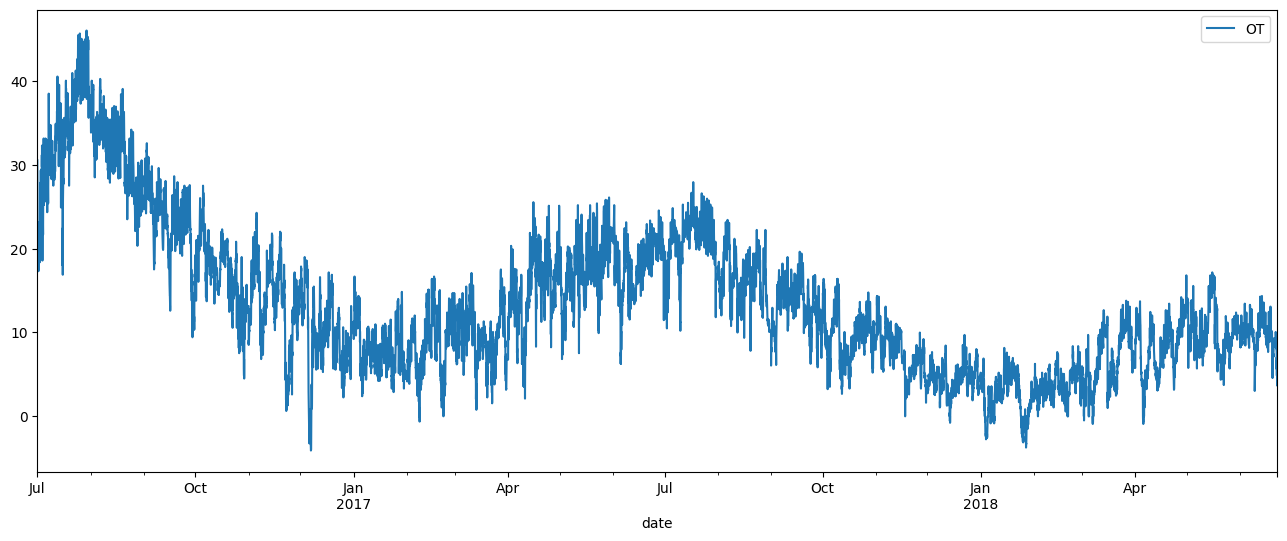

In [62]:
plot_cols = ['OT']
plot_feature = df[plot_cols]
plot_feature.index = df["date"]
_ = plot_feature.plot()

# Stationarity Test

Before we can apply univariate time series model to our data, we need to check if the data is stationary or not.

We can check the stationarity of our data using the Augmented Dickey-Fuller (ADF) test, KPSS test, and Phillips-Perron (PP) test. The `ndiffs` function from `pmdarima` library can be used to determine the number of differences required to make the data stationary.


In [13]:
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['OT'])

ADF Statistic: -3.435037
p-value: 0.009821
Reject the null hypothesis. Data is stationary


# Uni variate time series model (ARIMA):

 The `auto_arima` function from `pmdarima` library can be used to automatically select the best ARIMA model based on the AIC (Akaike Information Criterion) value.

In [69]:
#model = auto_arima(df["OT"], start_p=0, start_q=0,
                          # max_p=5, max_q=5,
                          # seasonal=False,
                          # d=0,
                          # trace=True,
                           #error_action='ignore',
                           #suppress_warnings=True,
                           #stepwise=True)

In [88]:
model = auto_arima(df["OT"], start_p=0, start_q=0,
                   max_p=10, max_q=10,
                   seasonal=True,
                   d=1,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46270.317, Time=3.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46269.629, Time=1.74 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=46269.676, Time=3.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46268.362, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=46271.337, Time=19.79 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 28.971 seconds


# Model Summary

In [89]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                17320
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -23133.181
Date:                Tue, 12 Mar 2024   AIC                          46268.362
Time:                        21:33:39   BIC                          46276.122
Sample:                             0   HQIC                         46270.919
                              - 17320                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.8467      0.004    203.290      0.000       0.839       0.855
Ljung-Box (L1) (Q):                   2.69   Jarque-Bera (JB):             41729.78
Prob(Q):                              0.10   Pr

#  Electricity Transformer Temperature Forecasting

Once the model is fitted, we can use it to forecast the future values. In our case, we forecast  next 100 values

In [90]:
# Créer une liste d'ID à partir de 0
ids = range(len(forecast))

# Créer un DataFrame contenant les ID et les prédictions
forecast_df = pd.DataFrame({'Id': ids, 'OT': forecast})

# Enregistrer le DataFrame dans un fichier CSV
forecast_df.to_csv('/content/next100.csv', index=False)


# Plotting Results

Finally, we can plot the original time series, and the forecasts using the following code:

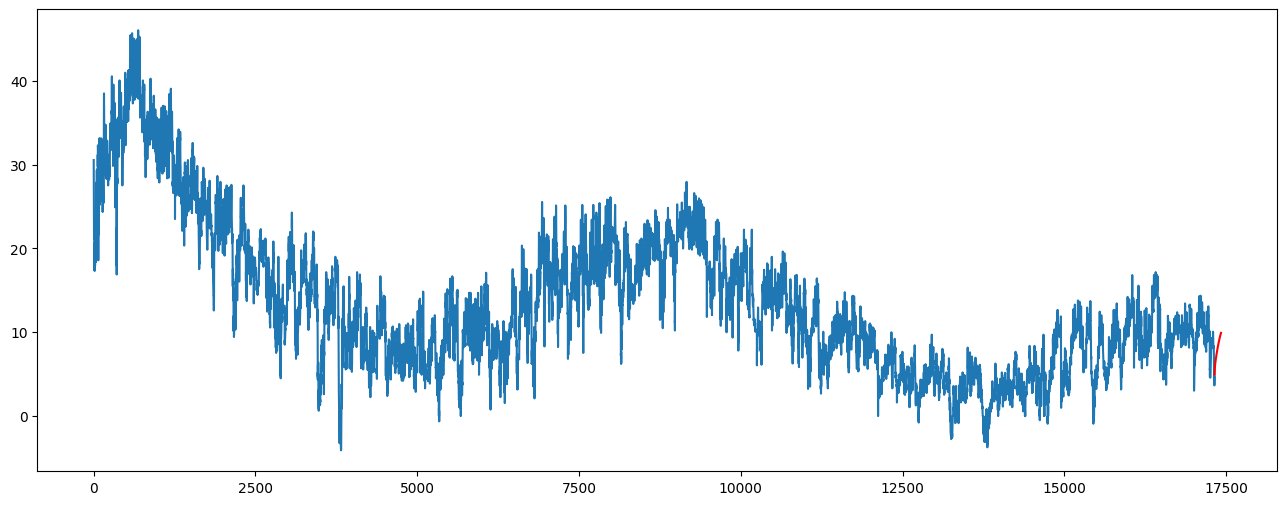

In [91]:
plt.plot(df["OT"])
plt.plot(forecast, color='red')
plt.show()

In [92]:
import pandas as pd

# Charger les deux fichiers CSV
next_dataset = pd.read_csv("/content/next.csv")
forecast_dataset = pd.read_csv("/content/next100.csv")

# Renommer la colonne "OT" du fichier forecast_dataset en "estimated_OT"
forecast_dataset = forecast_dataset.rename(columns={"OT": "estimated_OT"})

# Concaténer les deux dataframes en utilisant la fonction concat de pandas
combined_dataset = pd.concat([next_dataset, forecast_dataset["estimated_OT"]], axis=1)

# Enregistrer le résultat dans un nouveau fichier CSV
combined_dataset.to_csv("/content/combined_dataset.csv", index=False)

combined_dataset.head()

,date,OT,estimated_OT
0,2018-06-22 16:00:00,5.979,4.944868
1,2018-06-22 17:00:00,4.362,5.225358
2,2018-06-22 18:00:00,4.643,5.434396
3,2018-06-22 19:00:00,5.839,5.575296
4,2018-06-22 20:00:00,5.909,5.698511


In [93]:
from sklearn.metrics import mean_absolute_error
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(combined_dataset['OT'], combined_dataset['estimated_OT'])
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.751424122688846
